In [3]:
'''
Run in the given Sequence
Functions are declared before the main Function
In the main function Certain Seed values have been commented Which gives an intriguing output
After executing the main function A pop up window appears, Manual seed selection can be done (Select atleast 4) 
Close the Pop up window , wait for the kernal to execute.
'''

def on_mouse(event, x, y, flags, params):
    if event == cv.EVENT_LBUTTONDOWN:
        print ('Start Mouse Position: ' + str(x) + ', ' + str(y))
        s_box = x, y
        seed.append(s_box)



In [4]:
def region_growing(img, seed):
    #Parameters for region growing
    neighbors = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    region_threshold = 150
    region_size = 1
    dist=[0 for i in range(len(seed))]
    neighbor_points_list = []
    neighbor_intensity_list = []
    
    region_mean=[img[seed[i][0], seed[i][1]] for i in range(len(seed))]
    print(region_mean)

    #Input image parameters
    height, width = img.shape
    image_size = height * width

    #Initialize segmented output image
    segmented_img = np.zeros((height, width), np.uint8)
    print (seed)

    #Region growing until intensity difference becomes greater than certain threshold
    while (region_size < image_size):
        #Loop through neighbor pixels
        for i in range(len(seed)):
            if dist[i]>=region_threshold:
                region_size+=1
                pass
            else:
                for j in range(len(neighbors)):
                    #Compute the neighbor pixel position
                    x_new = seed[i][0] + neighbors[j][0]
                    y_new = seed[i][1] + neighbors[j][1]
                    #Boundary Condition - check if the coordinates are inside the image
                    check_inside = (x_new >= 0) & (y_new >= 0) & (x_new < height) & (y_new < width)

                    #Add neighbor if inside and not already in segmented_img
                    if check_inside and segmented_img[x_new, y_new] == 0:
                        neighbor_points_list.append([x_new, y_new])
                        neighbor_intensity_list.append(img[x_new, y_new])
                        if i==0:
                            segmented_img[x_new, y_new] = 10
                        elif i==1:
                            segmented_img[x_new, y_new] = 60
                        elif i==2:
                            segmented_img[x_new, y_new] = 120
                        elif i==3:
                            segmented_img[x_new, y_new] = 160
                        else:
                            segmented_img[x_new, y_new] = 255
                        
                
                #Add pixel with intensity nearest to the mean to the region
                dist[i] = abs(int(statistics.mean(neighbor_intensity_list)) - region_mean[i])
                dist_list = [abs(j - region_mean[i]) for j in  neighbor_intensity_list ]
                dist1 = min(dist_list) 
                index = dist_list.index(dist1) 
                region_size += 1 
                segmented_img[seed[i][0], seed[i][1]] = 255
                #New region mean
                region_mean[i] = (region_mean[i]*region_size + neighbor_intensity_list[index])/(region_size+1)

                #Update the seed value
                seed[i] = neighbor_points_list[index]

                #Remove the value from the neighborhood lists
                del neighbor_points_list[index]
                del neighbor_intensity_list[index]

    return segmented_img


Start Mouse Position: 97, 197
Start Mouse Position: 79, 135
Start Mouse Position: 170, 115
Start Mouse Position: 183, 180
Starting region growing based on last click
[-815, -90, -850, -722]
[(97, 197), (79, 135), (170, 115), (183, 180)]
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0  

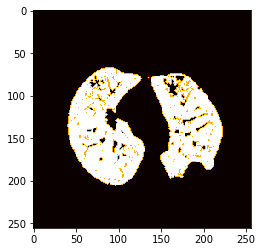

Done. Showing output now


In [5]:

import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(threshold=np.inf)
import pydicom
import os
import sys
import skimage
import random
import statistics
from scipy.spatial import distance
from skimage.segmentation import clear_border

path = r'C:\Users\Aakansh Togani\Desktop\Dicom_images'
files = [pydicom.dcmread(path + '/' + s) for s in sorted(os.listdir(path))] #Storing all images
size=256
images = [cv.resize(s.pixel_array,(size,size)) for s in files]    
gray=images[2]
dcm_gray = np.zeros([size,size],dtype = np.uint8)
gray_images = np.uint8(cv.normalize(gray, dcm_gray, 0, 255, cv.NORM_MINMAX) )
offset=1024
boxes = []
gray1=gray.astype(np.int16)-offset
seed= [] 


#For manual Seed selection
#code segment a 
cv.namedWindow('input')
cv.setMouseCallback('input', on_mouse, 0,)
cv.imshow('input', gray_images)
cv.waitKey(0)




print ("Starting region growing based on last click")

#The seed values below give significant regions 
#If wanting to excute with hardcoded seed value comment code segment a
#seed= [[100,75],[45,120],[89,110],[100,111]]
#seed=[(51, 166), (187, 160), (145, 93), (86, 86)]
#seed =[(58, 73), (26, 75), (84, 72), (106, 67)]
ig=region_growing(gray1,seed)
print(ig)
plt.imshow(ig,cmap='hot')
plt.show()
cv.imwrite(r'C:\Users\Aakansh Togani\Desktop\output\segementt.jpeg',ig)
print ("Done. Showing output now")
